___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice
import numpy as np

## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

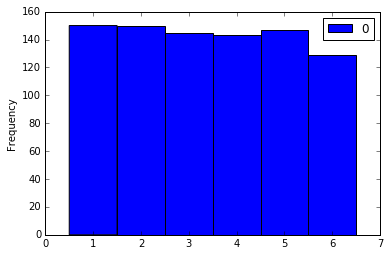

In [28]:
x= np.random.randint(0,7,1000)
dados = pd.DataFrame(x)

faixavalores = np.arange(0.5,7,1)
'''
d1 = pd.cut(dados, faixavalores)
d1.value_counts()
'''
plot= dados.plot.hist(bins=faixavalores)

A- A partir deste gráfico podemos concluir que a distribuição das probabilidades de o dado cair em cada uma das faces não é  equivalente como deveria ser teoricamente.

B- A probabilidade não é exatamente igual a teórica por conta do espaço amostral não ser suficientemente grande.



___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

In [9]:
y= np.random.randint(0.5,7,1000)
x= np.random.randint(0.5,7,1000)
lista2= []
lista3= []
lista4= []
a=0

for i in range(len(y)):
    c= y[i]+x[i]
    if (c == 7):
        lista4.append(c)

print(len(lista4)/1000)
for i in y:
    b= x[a]+i
    lista2.append(b)
    a+=1
    if (b == 7):
        lista3.append(b)
        
print(len(lista3)/1000)


    


0.11
0.11


Resposta: a probabilidade deu a mesma porque as listas que foram utilizadas não mudaram, saber ou não o resultado do primeiro dado não influencia o resultado do segundo

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [26]:
ganha=0
perde=0
for i in range(10000):
    porta_premiada = np.random.randint(0,3,1)
    porta_escolhida = np.random.randint(0,3,1)
    porta_aberta = np.random.randint(0,3,1)
    while(porta_aberta == porta_escolhida) or (porta_aberta == porta_premiada):
        porta_aberta = np.random.randint(0,3,1)
    troca = np.random.randint(0,3,1)
    while (troca == porta_aberta) or (troca == porta_escolhida):
        troca = np.random.randint(0,3,1)
    if troca == porta_premiada:
        ganha+=1
    else:
        perde+=1
print(ganha)
print(perde)

6664
3336
